In [1]:
import pandas as pd

# Încarcă fișierul applications.csv
applications_df = pd.read_csv('applications.csv')

# Încarcă fișierul industries.csv
industries_df = pd.read_csv('industries.csv')


In [2]:
#Elimini duplicate
applications_df.drop_duplicates(subset='applicant_id', keep='first', inplace=True)

In [5]:
#Completează valorile lipsă din câmpul External Rating cu zero
applications_df['External Rating'].fillna(0, inplace=True)
#Completează valorile lipsă din câmpul Education level cu textul “Average”
applications_df['Education level'].fillna('Average', inplace=True)

In [4]:
applications_df.head()

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id
0,11.30.2022 10:26:37,12000.0,29,Male,Blockchain,Other,8.0,"Higher Degree (bachelor's, specialist's, maste...","Spain, Madrid",99e7b0dc6cc05dd334d8f38dc26ce9b3
1,11.30.2022 10:26:39,NaN,36,Male,Public services / Government,Single,3.0,"Higher Degree (bachelor's, specialist's, maste...",NaN,63dfcf8e6904186650d6814279fbe42f
2,11.30.2022 10:26:58,7500.0,34,Male,Adtech / Advertising,Single,4.0,"Higher Degree (bachelor's, specialist's, maste...","Poland, Warsaw",10dbafaeb46c09e96b6987c03bbb3498
3,11.30.2022 10:27:31,1500.0,23,Female,Telecom,Single,0.0,"Higher Degree (bachelor's, specialist's, maste...","Germany, Berlin",5847ac62cc9eac5e323c2517dcc91ad1
4,11.30.2022 10:27:34,8400.0,33,Female,Automotive,Single,6.0,"Higher Degree (bachelor's, specialist's, maste...","Bulgaria, Sofia",5d21f3795b50de8e8f8f8d5f48b754f3


In [6]:
industries_df.head()

,Industry,Score
0,Blockchain,0
1,Public services / Government,20
2,Adtech / Advertising,10
3,Telecom,15
4,Automotive,15


In [8]:
#Adaugă coloana Score din industries_df la DataFrame-ul cu cereri
merged_df = applications_df.merge(industries_df, on='Industry', how='outer')

In [9]:
merged_df.head()

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score
0,11.30.2022 10:26:37,12000.0,29,Male,Blockchain,Other,8.0,"Higher Degree (bachelor's, specialist's, maste...","Spain, Madrid",99e7b0dc6cc05dd334d8f38dc26ce9b3,0
1,11.30.2022 10:30:00,NaN,22,Male,Blockchain,Single,2.0,Still a university student,NaN,bef0a5ba4df413cb8e1e3edeaf1f7de3,0
2,11.30.2022 10:31:29,12000.0,29,Male,Blockchain,Other,8.0,"Higher Degree (bachelor's, specialist's, maste...","Italy, Rome",99e7b0dc6cc05dd334d8f38dc26ce9b3,0
3,11.30.2022 10:36:59,30000.0,29,Male,Blockchain,Single,7.0,"Higher Degree (bachelor's, specialist's, maste...",Other,d85404bd5576f05b711ad56cad428463,0
4,11.30.2022 10:44:28,16050.0,50,Male,Blockchain,Other,15.0,"Higher Degree (bachelor's, specialist's, maste...","Denmark, Copenhagen",667563fc9922d71c7c2bfa8e9fba9fbc,0


In [10]:
#3. Calculează evaluarea cererii conform următoarelor condiții:
# -Evaluarea trebuie să fie un număr între 0 și 100
# -Evaluarea este suma scorurilor pentru cele 6 criterii;
# -Evaluarea este zero dacă nu există valoarea Amount sau dacă External Rating este zero.
#Verificăm dacă vârsta este între 35 și 55 de ani și atribuim 20 de puncte dacă este adevărat

#Adaug Evaluation ca si coloana ind DF cu valori 0
merged_df['Evaluation'] = 0
import numpy as np
merged_df.head()

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,Evaluation
0,11.30.2022 10:26:37,12000.0,29,Male,Blockchain,Other,8.0,"Higher Degree (bachelor's, specialist's, maste...","Spain, Madrid",99e7b0dc6cc05dd334d8f38dc26ce9b3,0,0
1,11.30.2022 10:30:00,NaN,22,Male,Blockchain,Single,2.0,Still a university student,NaN,bef0a5ba4df413cb8e1e3edeaf1f7de3,0,0
2,11.30.2022 10:31:29,12000.0,29,Male,Blockchain,Other,8.0,"Higher Degree (bachelor's, specialist's, maste...","Italy, Rome",99e7b0dc6cc05dd334d8f38dc26ce9b3,0,0
3,11.30.2022 10:36:59,30000.0,29,Male,Blockchain,Single,7.0,"Higher Degree (bachelor's, specialist's, maste...",Other,d85404bd5576f05b711ad56cad428463,0,0
4,11.30.2022 10:44:28,16050.0,50,Male,Blockchain,Other,15.0,"Higher Degree (bachelor's, specialist's, maste...","Denmark, Copenhagen",667563fc9922d71c7c2bfa8e9fba9fbc,0,0


In [11]:
print(merged_df.dtypes) #observ ca Applied at nu are formatul de datetime

Applied at          object
Amount             float64
Age                  int64
Gender              object
Industry            object
Marital status      object
External Rating    float64
Education level     object
Location            object
applicant_id        object
Score                int64
Evaluation           int64
dtype: object


In [12]:
#adaug libraria matplotlib,in coloana Applied at setez formatul de data
import matplotlib.pyplot as plt
merged_df['Applied at'] = pd.to_datetime(merged_df['Applied at'], format='mixed')
print(merged_df.dtypes)

Applied at         datetime64[ns]
Amount                    float64
Age                         int64
Gender                     object
Industry                   object
Marital status             object
External Rating           float64
Education level            object
Location                   object
applicant_id               object
Score                       int64
Evaluation                  int64
dtype: object


In [13]:
#Verificăm dacă vârsta este între 35 și 55 de ani și atribuim 20 de puncte dacă este adevărat
merged_df['Evaluation'] += (merged_df['Age'].between(35, 55)) * 20

#Adăugăm 20 de puncte dacă data aplicării este într-un weekend (sâmbătă sau duminică)
merged_df['Evaluation'] += (merged_df['Applied at'].dt.dayofweek >= 5) * 20

#Adăugăm 10 puncte dacă aplicantul este localizat în Kyiv sau în regiune
merged_df['Evaluation'] += (merged_df['Location'].str.contains('Kyiv')) * 10

#Încorporăm scorul din tabelul industries.csv în evaluare
merged_df['Evaluation'] += merged_df['Score'].clip(0, 20)

#Încorporăm scorul din tabelul industries.csv în evaluare
merged_df['Evaluation'] += (merged_df['External Rating'] >= 7) * 20
merged_df['Evaluation'] -= (merged_df['External Rating'] <= 2) * 20

#Adăugăm 20 de puncte dacă aplicantul este căsătorit
merged_df['Evaluation'] += (merged_df['Marital status'] == 'Married') * 20

#Adunăm toate punctele pentru a obține evaluarea totală
merged_df.loc[merged_df['Amount'].isna() | (merged_df['External Rating'] == 0), 'Evaluation'] = 0
merged_df['Evaluation'] = merged_df['Evaluation'].clip(0, 100)
merged_df.head()

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,Evaluation
0,2022-11-30 10:26:37,12000.0,29,Male,Blockchain,Other,8.0,"Higher Degree (bachelor's, specialist's, maste...","Spain, Madrid",99e7b0dc6cc05dd334d8f38dc26ce9b3,0,20
1,2022-11-30 10:30:00,NaN,22,Male,Blockchain,Single,2.0,Still a university student,NaN,bef0a5ba4df413cb8e1e3edeaf1f7de3,0,0
2,2022-11-30 10:31:29,12000.0,29,Male,Blockchain,Other,8.0,"Higher Degree (bachelor's, specialist's, maste...","Italy, Rome",99e7b0dc6cc05dd334d8f38dc26ce9b3,0,20
3,2022-11-30 10:36:59,30000.0,29,Male,Blockchain,Single,7.0,"Higher Degree (bachelor's, specialist's, maste...",Other,d85404bd5576f05b711ad56cad428463,0,20
4,2022-11-30 10:44:28,16050.0,50,Male,Blockchain,Other,15.0,"Higher Degree (bachelor's, specialist's, maste...","Denmark, Copenhagen",667563fc9922d71c7c2bfa8e9fba9fbc,0,40


In [15]:
#4. În tabelul rezultat, lasă doar cererile cu o evaluare mai mare decât zero, aceste cereri vor fi considerate acceptate.

# Filtrarea cererilor cu evaluare mai mare decât zero

successful_applicants = merged_df[merged_df['Evaluation'] > 0]
successful_applicants.head()

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,Evaluation
0,2022-11-30 10:26:37,12000.0,29,Male,Blockchain,Other,8.0,"Higher Degree (bachelor's, specialist's, maste...","Spain, Madrid",99e7b0dc6cc05dd334d8f38dc26ce9b3,0,20
2,2022-11-30 10:31:29,12000.0,29,Male,Blockchain,Other,8.0,"Higher Degree (bachelor's, specialist's, maste...","Italy, Rome",99e7b0dc6cc05dd334d8f38dc26ce9b3,0,20
3,2022-11-30 10:36:59,30000.0,29,Male,Blockchain,Single,7.0,"Higher Degree (bachelor's, specialist's, maste...",Other,d85404bd5576f05b711ad56cad428463,0,20
4,2022-11-30 10:44:28,16050.0,50,Male,Blockchain,Other,15.0,"Higher Degree (bachelor's, specialist's, maste...","Denmark, Copenhagen",667563fc9922d71c7c2bfa8e9fba9fbc,0,40
5,2022-11-30 10:46:30,8550.0,40,Male,Blockchain,Married,1.0,"Higher Degree (bachelor's, specialist's, maste...","France, Paris",056d0a80808828a4d4017224fd17491e,0,20


In [16]:
#5 Grupează datele din tabelul rezultat în funcție de săptămâna depunerii cererii și afișează evaluarea medie a cererilor acceptate în fiecare săptămână pe grafic.

# Extragem săptămâna din coloana 'Applied at'
merged_df['Applied at'] = pd.to_datetime(merged_df['Applied at'], format='mixed', errors='coerce')
merged_df.head(20)

,Applied at,Amount,Age,Gender,Industry,Marital status,External Rating,Education level,Location,applicant_id,Score,Evaluation
0,2022-11-30 10:26:37,12000.0,29,Male,Blockchain,Other,8.0,"Higher Degree (bachelor's, specialist's, maste...","Spain, Madrid",99e7b0dc6cc05dd334d8f38dc26ce9b3,0,20
1,2022-11-30 10:30:00,NaN,22,Male,Blockchain,Single,2.0,Still a university student,NaN,bef0a5ba4df413cb8e1e3edeaf1f7de3,0,0
2,2022-11-30 10:31:29,12000.0,29,Male,Blockchain,Other,8.0,"Higher Degree (bachelor's, specialist's, maste...","Italy, Rome",99e7b0dc6cc05dd334d8f38dc26ce9b3,0,20
3,2022-11-30 10:36:59,30000.0,29,Male,Blockchain,Single,7.0,"Higher Degree (bachelor's, specialist's, maste...",Other,d85404bd5576f05b711ad56cad428463,0,20
4,2022-11-30 10:44:28,16050.0,50,Male,Blockchain,Other,15.0,"Higher Degree (bachelor's, specialist's, maste...","Denmark, Copenhagen",667563fc9922d71c7c2bfa8e9fba9fbc,0,40
5,2022-11-30 10:46:30,8550.0,40,Male,Blockchain,Married,1.0,"Higher Degree (bachelor's, specialist's, maste...","France, Paris",056d0a80808828a4d4017224fd17491e,0,20
6,2022-11-30 10:48:36,8400.0,27,Male,Blockchain,Married,6.0,"Higher Degree (bachelor's, specialist's, maste...","Belgium, Brussels",56f735f424804136be23a2c0cce2ac65,0,20
7,2022-11-30 10:48:58,5400.0,19,Male,Blockchain,Married,1.0,Still a university student,Other,a4ba22c3ed6b416d74a4c348a1b83e21,0,0
8,2022-11-30 10:50:22,15000.0,21,Male,Blockchain,Married,2.0,"Higher Degree (bachelor's, specialist's, maste...","Sweden, Stockholm",a81709423dab2becccc2cffa5ed16b89,0,0
9,2022-11-30 10:58:52,9300.0,27,Male,Blockchain,Married,5.0,Second Higher Degree,"Slovakia, Bratislava",91b22f336ece068e94b371c104e25daf,0,20


In [17]:
print(merged_df[merged_df['Applied at'].isnull()])


Empty DataFrame
Columns: [Applied at, Amount, Age, Gender, Industry, Marital status, External Rating, Education level, Location, applicant_id, Score, Evaluation]
Index: []


In [19]:
#Calculăm evaluarea medie pe săptămână
merged_df['Week'] = merged_df['Applied at'].dt.isocalendar().week
weekly_evaluation_mean = merged_df.groupby('Week')['Evaluation'].mean()

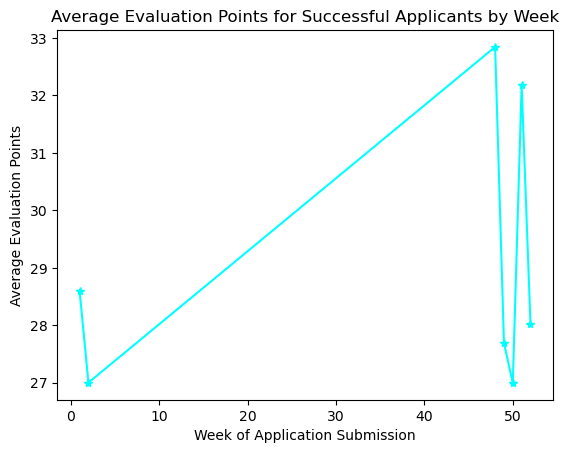

In [22]:
#Construiesc graficul 
plt.plot(weekly_evaluation_mean.index, weekly_evaluation_mean.values, marker='*', color = 'cyan')
plt.title('Average Evaluation Points for Successful Applicants by Week')
plt.xlabel('Week of Application Submission')
plt.ylabel('Average Evaluation Points')
plt.show()